In [ ]:
%load_ext autoreload
%autoreload 2


import numpy as np
import sys

import matplotlib.pyplot as plt  
import seaborn as sns
import figures as figs
import calculations
from types import SimpleNamespace
import pandas as pd

# Ploting jacobians wrt ptilde
from matplotlib.ticker import FormatStrFormatter

import gc  # For garbage collection
import itertools


from seaborn import set_palette
from matplotlib import rc
plt.style.use('seaborn-v0_8-white')
set_palette("colorblind")
rc('font',**{'family':'serif','serif': ['Palatino']})
rc('text',usetex=True)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

# Should make insure text size in latex mode
# plt.rcParams.update({
#     "text.latex.preamble": r"\usepackage{palatino} \normalsize"
# })

from IHANKModel import IHANKModelClass

from pandasdmx import Request
import pandas as pd
import matplotlib.pyplot as plt





# Energy inflation 

In [ ]:

# Step 1: Connect to Eurostat
estat = Request('ESTAT')

# Step 2: Download the data
data_response = estat.data(
    resource_id='PRC_HICP_CTRB',
    key={
        'geo': 'EA',       # Euro Area
        'coicop': 'NRG',   # Energy
        'freq': 'M'        # Monthly
    },
    params={
        'startPeriod': '2015-01',
        'endPeriod': '2025-01'
    }
)

# Step 3: Convert to pandas DataFrame
df = data_response.to_pandas().reset_index()

In [ ]:
# Figure

# Step 1: Connect to Eurostat
estat = Request('ESTAT')

# Step 2: Download the data
data_response = estat.data(
    resource_id='PRC_HICP_CTRB',
    key={
        'geo': 'EA',       # Euro Area
        'coicop': 'NRG',   # Energy
        'freq': 'M'        # Monthly
    },
    params={
        'startPeriod': '2015-01',
        'endPeriod': '2025-01'
    }
)

# Step 3: Convert to pandas DataFrame
df = data_response.to_pandas().reset_index()

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()
time = pd.to_datetime(df['TIME_PERIOD'])
inf_contirbution = df['value'].astype(float)  # Ensure values are float for plotting

ax.plot(time, inf_contirbution,  label='Energy Contribution to inflation')
ax.set_title('Energy Contribution to Inflation')
ax.set_xlabel('Year')
ax.set_ylabel('Percentage Points')

# Expenditure by income decile

coicop
CP00:  All-items HICP
CP0722:  Fuels and lubricants for personal transport equipment 
CP045:    Electricity, gas and other fuels

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandasdmx import Request

# Step 1: Connect to Eurostat
estat = Request('ESTAT')

# Step 2: Download the data (for QU1 to QU5)
data_response = estat.data(
    resource_id='ICW_AFF_01',
    key={
        'geo': 'EA',
        'coicop': ['CP00', 'CP045', 'CP0722'],  # Total, electricity/gas, fuels
        'quant_inc': ['QU1', 'QU2', 'QU3', 'QU4', 'QU5']
    },
    params={
        'startPeriod': '2015',
        'endPeriod': '2015'
    }
)

# Step 3: Convert to DataFrame
df = data_response.to_pandas().reset_index()

# Step 4: Prepare data
# Manually set quintile rank for sorting
quintile_order = ['QU1', 'QU2', 'QU3', 'QU4', 'QU5']
df['quant_rank'] = df['quant_inc'].apply(lambda q: quintile_order.index(q) + 1)

# Pivot to wide format
df_pivot = df.pivot(index='quant_inc', columns='coicop', values='value').reset_index()

# Compute energy share
df_pivot['energy_total'] = df_pivot['CP045'] + df_pivot['CP0722']
df_pivot['energy_share'] = df_pivot['energy_total'] / df_pivot['CP00'] * 100

# Sort by rank
df_pivot['quant_rank'] = df_pivot['quant_inc'].apply(lambda q: quintile_order.index(q) + 1)
df_pivot = df_pivot.sort_values('quant_rank')

# Step 5: Plot
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()

# Set x-axis to 1–5 instead of QU1–QU5
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_xticklabels([ 1, 2, 3, 4, 5, 0])

# ax.bar(df_pivot['quant_inc'], df_pivot['energy_share'], color='cornflowerblue')
ax.bar(df_pivot['quant_inc'], df_pivot['energy_total'])
ax.set_title('Energy Consumption', fontsize=14)
ax.set_xlabel('Income Quintile', fontsize=12)
ax.set_ylabel('\% of expenditur', fontsize=12)
# ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
fig.savefig('plots/energy_consumption_quintiles.png', dpi=300, bbox_inches='tight')


# Inflation

In [ ]:
from pandasdmx import Request
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to Eurostat
estat = Request('ESTAT')
# prc_hicp_manr
# Step 2: Download the data
data_response = estat.data(
    resource_id='PRC_HICP_MANR',
    key={
        'geo': 'EA',       # Euro Area
        'coicop': 'CP00',   # Energy
        'freq': 'M'        # Monthly
    },
    params={
        'startPeriod': '2015-01',
        'endPeriod': '2025-01'
    }
)

# Step 3: Convert to pandas DataFrame
df = data_response.to_pandas().reset_index()

fig = plt.figure(figsize=(5, 5))

ax = fig.add_subplot()
time = pd.to_datetime(df['TIME_PERIOD'])
inflation = df['value'].astype(float)  # Ensure values are float for plotting

ax.plot(time, inflation)
ax.set_title('Inflaiton ')
ax.set_xlabel('Year')
ax.set_ylabel('\% Year-on-Year Change')

fig.savefig('plots/inflation.png', dpi=300, bbox_inches='tight')

# Energy prices

In [ ]:
from pandasdmx import Request
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to Eurostat
estat = Request('ESTAT')
# prc_hicp_manr
# Step 2: Download the data
data_response = estat.data(
    resource_id='PRC_HICP_MANR',
    key={
        'geo': 'EA',       # Euro Area
        'coicop': 'NRG',   # Energy
        'freq': 'M'        # Monthly
    },
    params={
        'startPeriod': '2015-01',
        'endPeriod': '2025-01'
    }
)

# Step 3: Convert to pandas DataFrame
df = data_response.to_pandas().reset_index()

fig = plt.figure(figsize=(5, 5))

ax = fig.add_subplot()
time = pd.to_datetime(df['TIME_PERIOD'])
inf_contirbution = df['value'].astype(float)  # Ensure values are float for plotting

ax.plot(time, inf_contirbution,  label='HICP Energy Prices')
ax.set_title('Energy prices ')
ax.set_xlabel('Year')
ax.set_ylabel('\% Year-on-Year Change')

fig.savefig('plots/energy_prices.png', dpi=300, bbox_inches='tight')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandasdmx import Request

estat = Request('ESTAT')

# --- 1. Inflation data ---
inflation_resp = estat.data(
    resource_id='PRC_HICP_MANR',
    key={'geo': 'EA', 'coicop': 'CP00', 'freq': 'M'},
    params={'startPeriod': '2015-01', 'endPeriod': '2025-01'}
)
df_inflation = inflation_resp.to_pandas().reset_index()
df_inflation['TIME_PERIOD'] = pd.to_datetime(df_inflation['TIME_PERIOD'])
df_inflation['value'] = df_inflation['value'].astype(float)

# --- 2. Energy share by quintile ---
energy_resp = estat.data(
    resource_id='ICW_AFF_01',
    key={
        'geo': 'EU',
        'coicop': ['CP00', 'CP045', 'CP0722'],
        'quant_inc': ['QU1', 'QU2', 'QU3', 'QU4', 'QU5']
    },
    params={'startPeriod': '2015', 'endPeriod': '2015'}
)
df_energy = energy_resp.to_pandas().reset_index()
quintile_order = ['QU1', 'QU2', 'QU3', 'QU4', 'QU5']
df_energy['quant_rank'] = df_energy['quant_inc'].apply(lambda q: quintile_order.index(q) + 1)
df_pivot = df_energy.pivot(index='quant_inc', columns='coicop', values='value').reset_index()
df_pivot['energy_total'] = df_pivot['CP045'] + df_pivot['CP0722']
df_pivot['energy_share'] = df_pivot['energy_total'] / df_pivot['CP00'] * 100
df_pivot['quant_rank'] = df_pivot['quant_inc'].apply(lambda q: quintile_order.index(q) + 1)
df_pivot = df_pivot.sort_values('quant_rank')

# --- 3. Energy prices ---
prices_resp = estat.data(
    resource_id='PRC_HICP_MANR',
    key={'geo': 'EA', 'coicop': 'NRG', 'freq': 'M'},
    params={'startPeriod': '2015-01', 'endPeriod': '2025-01'}
)
df_prices = prices_resp.to_pandas().reset_index()
df_prices['TIME_PERIOD'] = pd.to_datetime(df_prices['TIME_PERIOD'])
df_prices['value'] = df_prices['value'].astype(float)

# --- Additional data: Energy contribution to inflation ---
contrib_resp = estat.data(
    resource_id='PRC_HICP_CTRB',
    key={'geo': 'EA', 'coicop': 'NRG', 'freq': 'M'},
    params={'startPeriod': '2015-01', 'endPeriod': '2025-01'}
)
df_contrib = contrib_resp.to_pandas().reset_index()
df_contrib['TIME_PERIOD'] = pd.to_datetime(df_contrib['TIME_PERIOD'])
df_contrib['value'] = df_contrib['value'].astype(float)

# --- Modify Subplot 1 to include energy contribution ---
fig = plt.figure(figsize=(15, 4))

# Subplot 1: Inflation
ax1 = fig.add_subplot(131)
ax1.plot(df_inflation['TIME_PERIOD'], df_inflation['value'], color='tab:blue', label='Overall Inflation')
# ax1.plot(df_contrib['TIME_PERIOD'], df_contrib['value'], color='tab:red', linestyle='--', label='Energy Contribution')
ax1.set_title('(a) Inflation')
ax1.set_xlabel('Year')
ax1.set_ylabel(r'\% YoY Change')
ax1.yaxis.set_label_coords(-0.15, 0.5)
# ax1.legend()

# Subplot 2: Energy expenditure share
ax2 = fig.add_subplot(133)
ax2.bar(df_pivot['quant_rank'], df_pivot['energy_share'], color='tab:blue')
ax2.set_xticks([1, 2, 3, 4, 5])
ax2.set_xticklabels([1, 2, 3, 4, 5])
ax2.set_title('(c) Energy Expenditure Share')
ax2.set_xlabel('Income Quintile')
ax2.set_ylabel(r'\% of Expenditure')
ax2.yaxis.set_label_coords(-0.15, 0.5)

# Subplot 3: Energy prices
ax3 = fig.add_subplot(132)
# ax3.plot(df_prices['TIME_PERIOD'], df_prices['value'], color='tab:blue')
ax3.plot(df_contrib['TIME_PERIOD'], df_contrib['value'], color='tab:blue',  label='Energy Contribution')
ax3.set_title('(b) Energy Contribution to Inflation')
ax3.set_xlabel('Year')
ax3.set_ylabel(r'\%-points ')
ax3.yaxis.set_label_coords(-0.15, 0.5)

# Final layout
fig.subplots_adjust(left=0.08, right=0.98, wspace=0.3)
fig.savefig('plots/intro_figure.png', dpi=300, bbox_inches='tight')
plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandasdmx import Request

estat = Request('ESTAT')

# --- 1. Inflation data ---
inflation_resp = estat.data(
    resource_id='PRC_HICP_MANR',
    key={'geo': 'EA', 'coicop': 'CP00', 'freq': 'M'},
    params={'startPeriod': '2015-01', 'endPeriod': '2025-01'}
)
df_inflation = inflation_resp.to_pandas().reset_index()
df_inflation['TIME_PERIOD'] = pd.to_datetime(df_inflation['TIME_PERIOD'])
df_inflation['value'] = df_inflation['value'].astype(float)

# --- 2. Energy share by quintile ---
energy_resp = estat.data(
    resource_id='ICW_AFF_01',
    key={
        'geo': 'EA',
        'coicop': ['CP00', 'CP045', 'CP0722'],
        'quant_inc': ['QU1', 'QU2', 'QU3', 'QU4', 'QU5']
    },
    params={'startPeriod': '2015', 'endPeriod': '2015'}
)
df_energy = energy_resp.to_pandas().reset_index()
quintile_order = ['QU1', 'QU2', 'QU3', 'QU4', 'QU5']
df_energy['quant_rank'] = df_energy['quant_inc'].apply(lambda q: quintile_order.index(q) + 1)
df_pivot = df_energy.pivot(index='quant_inc', columns='coicop', values='value').reset_index()
df_pivot['energy_total'] = df_pivot['CP045'] + df_pivot['CP0722']
df_pivot['energy_share'] = df_pivot['energy_total'] / df_pivot['CP00'] * 100
df_pivot['quant_rank'] = df_pivot['quant_inc'].apply(lambda q: quintile_order.index(q) + 1)
df_pivot = df_pivot.sort_values('quant_rank')

# --- 3. Energy prices ---
prices_resp = estat.data(
    resource_id='PRC_HICP_MANR',
    key={'geo': 'EA', 'coicop': 'NRG', 'freq': 'M'},
    params={'startPeriod': '2015-01', 'endPeriod': '2025-01'}
)
df_prices = prices_resp.to_pandas().reset_index()
df_prices['TIME_PERIOD'] = pd.to_datetime(df_prices['TIME_PERIOD'])
df_prices['value'] = df_prices['value'].astype(float)

# --- Plotting with add_subplot ---
fig = plt.figure(figsize=(15, 4))

# Subplot 1: Inflation
ax1 = fig.add_subplot(131)
ax1.plot(df_inflation['TIME_PERIOD'], df_inflation['value'], color='tab:blue')
ax1.set_title('Inflation (HICP)')
ax1.set_xlabel('Year')
ax1.set_ylabel('% YoY Change')

# Subplot 2: Energy expenditure share
ax2 = fig.add_subplot(132)
ax2.bar(df_pivot['quant_rank'], df_pivot['energy_share'], color='tab:orange')
ax2.set_xticks([1, 2, 3, 4, 5])
ax2.set_xticklabels([1, 2, 3, 4, 5])
ax2.set_title('Energy Expenditure Share')
ax2.set_xlabel('Income Quintile')
ax2.set_ylabel('% of Expenditure')

# Subplot 3: Energy prices
ax3 = fig.add_subplot(133)
ax3.plot(df_prices['TIME_PERIOD'], df_prices['value'], color='tab:green')
ax3.set_title('Energy Prices (HICP NRG)')
ax3.set_xlabel('Year')
ax3.set_ylabel('% YoY Change')

# Save figure
plt.tight_layout()
fig.savefig('plots/combined_figure.png', dpi=300, bbox_inches='tight')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandasdmx import Request

estat = Request('ESTAT')

# --- 1. Inflation data ---
inflation_resp = estat.data(
    resource_id='PRC_HICP_MANR',
    key={'geo': 'EU', 'coicop': 'CP00', 'freq': 'M'},
    params={'startPeriod': '2000-01', 'endPeriod': '2025-01'}
)
df_inflation = inflation_resp.to_pandas().reset_index()
df_inflation['TIME_PERIOD'] = pd.to_datetime(df_inflation['TIME_PERIOD'])
df_inflation['value'] = df_inflation['value'].astype(float)

# --- 2. Energy share by quintile ---
energy_resp = estat.data(
    resource_id='ICW_AFF_01',
    key={
        'geo': 'EU',
        'coicop': ['CP00', 'CP045', 'CP0722'],
        'quant_inc': ['QU1', 'QU2', 'QU3', 'QU4', 'QU5']
    },
    params={'startPeriod': '2015', 'endPeriod': '2015'}
)
df_energy = energy_resp.to_pandas().reset_index()
quintile_order = ['QU1', 'QU2', 'QU3', 'QU4', 'QU5']
df_energy['quant_rank'] = df_energy['quant_inc'].apply(lambda q: quintile_order.index(q) + 1)
df_pivot = df_energy.pivot(index='quant_inc', columns='coicop', values='value').reset_index()
df_pivot['energy_total'] = df_pivot['CP045'] + df_pivot['CP0722']
df_pivot['energy_share'] = df_pivot['energy_total'] / df_pivot['CP00'] * 100
df_pivot['quant_rank'] = df_pivot['quant_inc'].apply(lambda q: quintile_order.index(q) + 1)
df_pivot = df_pivot.sort_values('quant_rank')

# --- 3. Energy prices ---
prices_resp = estat.data(
    resource_id='PRC_HICP_MANR',
    key={'geo': 'EA', 'coicop': 'NRG', 'freq': 'M'},
    params={'startPeriod': '2000-01', 'endPeriod': '2025-01'}
)
df_prices = prices_resp.to_pandas().reset_index()
df_prices['TIME_PERIOD'] = pd.to_datetime(df_prices['TIME_PERIOD'])
df_prices['value'] = df_prices['value'].astype(float)

# --- Plotting with add_subplot ---
fig = plt.figure(figsize=(15, 4))

# Subplot 1: Inflation
ax1 = fig.add_subplot(131)
ax1.plot(df_inflation['TIME_PERIOD'], df_inflation['value'], color='tab:blue')
ax1.set_title('Inflation')
ax1.set_xlabel('Year')
ax1.set_ylabel(r'\% YoY Change')
ax1.yaxis.set_label_coords(-0.15, 0.5)

# Subplot 2: Energy expenditure share
ax2 = fig.add_subplot(132)
ax2.bar(df_pivot['quant_rank'], df_pivot['energy_share'], color='tab:orange')
ax2.set_xticks([1, 2, 3, 4, 5])
ax2.set_xticklabels([1, 2, 3, 4, 5])
ax2.set_title('Energy Expenditure Share')
ax2.set_xlabel('Income Quintile')
ax2.set_ylabel(r'\% of Expenditure')
ax2.yaxis.set_label_coords(-0.15, 0.5)

# Subplot 3: Energy prices
ax3 = fig.add_subplot(133)
ax3.plot(df_prices['TIME_PERIOD'], df_prices['value'], color='tab:green')
ax3.set_title('Energy Prices ')
ax3.set_xlabel('Year')
ax3.set_ylabel(r'\% YoY Change')
ax3.yaxis.set_label_coords(-0.15, 0.5)

# Final layout
fig.subplots_adjust(left=0.08, right=0.98, wspace=0.3)
fig.savefig('plots/intro_figure.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandasdmx import Request

# Connect to Eurostat once
estat = Request('ESTAT')

# --- 1. Inflation Data ---
inflation_resp = estat.data(
    resource_id='PRC_HICP_MANR',
    key={'geo': 'EA', 'coicop': 'CP00', 'freq': 'M'},
    params={'startPeriod': '2015-01', 'endPeriod': '2025-01'}
)
df_inflation = inflation_resp.to_pandas().reset_index()
df_inflation['TIME_PERIOD'] = pd.to_datetime(df_inflation['TIME_PERIOD'])
df_inflation['value'] = df_inflation['value'].astype(float)

# --- 2. Energy Share by Quintile ---
energy_resp = estat.data(
    resource_id='ICW_AFF_01',
    key={
        'geo': 'EA',
        'coicop': ['CP00', 'CP045', 'CP0722'],
        'quant_inc': ['QU1', 'QU2', 'QU3', 'QU4', 'QU5']
    },
    params={'startPeriod': '2015', 'endPeriod': '2015'}
)
df_energy = energy_resp.to_pandas().reset_index()
quintile_order = ['QU1', 'QU2', 'QU3', 'QU4', 'QU5']
df_energy['quant_rank'] = df_energy['quant_inc'].apply(lambda q: quintile_order.index(q) + 1)
df_pivot = df_energy.pivot(index='quant_inc', columns='coicop', values='value').reset_index()
df_pivot['energy_total'] = df_pivot['CP045'] + df_pivot['CP0722']
df_pivot['energy_share'] = df_pivot['energy_total'] / df_pivot['CP00'] * 100
df_pivot['quant_rank'] = df_pivot['quant_inc'].apply(lambda q: quintile_order.index(q) + 1)
df_pivot = df_pivot.sort_values('quant_rank')

# --- 3. Energy Prices ---
prices_resp = estat.data(
    resource_id='PRC_HICP_MANR',
    key={'geo': 'EA', 'coicop': 'NRG', 'freq': 'M'},
    params={'startPeriod': '2015-01', 'endPeriod': '2025-01'}
)
df_prices = prices_resp.to_pandas().reset_index()
df_prices['TIME_PERIOD'] = pd.to_datetime(df_prices['TIME_PERIOD'])
df_prices['value'] = df_prices['value'].astype(float)

# --- Plotting All 3 Subplots ---
# import matplotlib.pyplot as plt

# fig = plt.figure(figsize=(15, 4))

# # Subplot 1 (left)
# ax0 = fig.add_subplot(131)
# ax0.set_ylabel('Percentage Points')

# # Subplot 2 (middle)
# ax1 = fig.add_subplot(132)
# ax1.set_ylabel('% of Expenditure')
# ax1.yaxis.set_label_position("left")
# ax1.yaxis.set_ticks_position("left")

# # Subplot 3 (right)
# ax2 = fig.add_subplot(133)
# ax2.set_ylabel('% YoY Change')
# ax2.yaxis.set_label_position("left")
# ax2.yaxis.set_ticks_position("left")

# # Adjust spacing to prevent label cutoff
# plt.tight_layout()
# fig.subplots_adjust(wspace=0.4, left=0.06, right=0.98)

# plt.show()



fig, axes = plt.subplots(1, 3, figsize=(15, 4))

fig = plt.figure(figsize=(15, 4))
ax0 = fig.add_subplot(131)
ax0.set_ylabel('Percentage Points')

ax1 = fig.add_subplot(132)
ax1.set_ylabel('% of Expenditure')

axes.plot(df_inflation['TIME_PERIOD'], df_inflation['value'], color='blue')

axes[0].plot(df_inflation['TIME_PERIOD'], df_inflation['value'], color='blue')


# Subplot 1: Inflation
axes[0].plot(df_inflation['TIME_PERIOD'], df_inflation['value'])
axes[0].set_title('Inflation (HICP)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('% YoY Change')


# Subplot 2: Energy Share by Quintile
axes[1].bar(df_pivot['quant_rank'], df_pivot['energy_share'])
axes[1].set_xticks([1, 2, 3, 4, 5])
axes[1].set_xticklabels([1, 2, 3, 4, 5])
axes[1].set_title('Energy Expenditure Share')
axes[1].set_xlabel('Income Quintile')
axes[1].set_ylabel('% of Expenditure')

# Subplot 3: Energy Prices
axes[2].plot(df_prices['TIME_PERIOD'], df_prices['value'])
axes[2].set_title('Energy Prices (HICP NRG)')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('% YoY Change')

# plt.tight_layout()
plt.tight_layout()
fig.subplots_adjust(top=0.85)

# fig.suptitle('Inflation, Energy Expenditure and Energy Prices (Euro Area)', fontsize=14, y=1.05)
# fig.subplots_adjust(top=0.85)

# Save combined figure
fig.savefig('plots/combined_figure.png', dpi=300, bbox_inches='tight')


# Energy Share

Pick countries/areas 
From eurostat

https://ec.europa.eu/eurostat/databrowser/view/prc_hicp_ctrb__custom_16920689/default/table?lang=en

things 
energy prices 
inflation 
energy share 

In [ ]:
from pandasdmx import Request
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to Eurostat
estat = Request('ESTAT')
# prc_hicp_manr
# Step 2: Download the data
data_response = estat.data(
    resource_id='PRC_HICP_MANR',
    key={
        'geo': 'EA',       # Euro Area
        'coicop': 'NRG',   # Energy
        'freq': 'M'        # Monthly
    },
    params={
        'startPeriod': '2015-01',
        'endPeriod': '2025-01'
    }
)

# Step 3: Convert to pandas DataFrame
df = data_response.to_pandas().reset_index()

fig = plt.figure(figsize=(5, 5))

ax = fig.add_subplot()
time = pd.to_datetime(df['TIME_PERIOD'])
inf_contirbution = df['value'].astype(float)  # Ensure values are float for plotting

ax.plot(time, inf_contirbution,  label='HICP Energy Prices')
ax.set_title('Energy prices ')
ax.set_xlabel('Year')
ax.set_ylabel('\% (Year-on-Year Change')



In [ ]:
import pandasdmx as sdmx

# Create a request to Eurostat
estat = sdmx.Request('ESTAT')

# Retrieve all dataflows
dataflows_response = estat.dataflow()

# Convert the dataflows to a pandas Series for easy inspection
dataflows = sdmx.to_pandas(dataflows_response.dataflow)

# Display the first few dataflows
print(dataflows.head())


In [ ]:
# Replace 'prc_hicp_ctrb' with the correct dataflow identifier if different
dsd_response = estat.datastructure('prc_hicp_ctrb')

# Access the data structure definition
# dsd = dsd_response.structure['prc_hicp_ctrb']

# # Display the dimensions of the dataset
# print(dsd.dimensions)


In [ ]:
import pandasdmx

# Basic test to confirm functionality
from pandasdmx import Request
estat = Request('ESTAT')
resp = estat.dataflow()

# List a few dataflows
for key, flow in list(resp.dataflow.items())[:10]:
    print(f"{key}: {flow.name['en']}")


In [ ]:
# Search for the dataset with matching name
for key, flow in resp.dataflow.items():
    if 'contributions to ea annual inflation' in flow.name['en'].lower():
        print(f"{key}: {flow.name['en']}")


In [ ]:
# Check available structure keys
print(dsd_response.structure.keys())


In [ ]:
# Load the structure definition
dsd_response = estat.datastructure('PRC_HICP_CTRB')

# Print available dimension IDs
dsd = dsd_response.structure['PRC_HICP_CTRB']
for dim in dsd.dimensions.components:
    print(dim.id)


In [ ]:
dsd

In [ ]:
data_response = estat.data(
    resource_id='PRC_HICP_CTRB',
    key={
        'geo': 'EA',        # Germany
        'coicop': 'NRG',   # All-items HICP
        'unit': 'PC_PNT',       # Contribution in percentage points
        'freq': 'M'         # Monthly
    },
    params={
        'startPeriod': '2015-01',
        'endPeriod': '2025-01'
    }
)

# Convert to pandas DataFrame
df = data_response.to_pandas()
print(df.head())


In [ ]:
df_reset['TIME_PERIOD']

In [ ]:
# Reset index if needed (depends on pandasdmx version)
df_reset = df.reset_index()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df_reset['TIME_PERIOD'], df_reset['value'], marker='o', linestyle='-')

# Labels and title
plt.title('HICP Energy Contribution in Euro Area (NRG)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Contribution (percentage points)', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


# Stop 

In [ ]:
# Mapping of COICOP codes to tradability
coicop_tradable = {
    'CP01': True,
    'CP011': True,
    'CP012': True,
    'CP02': True,
    'CP021': True,
    'CP022': True,
    'CP03': True,
    'CP031': True,
    'CP032': True,
    'CP04': False,
    'CP041': False,
    'CP042': False,
    'CP043': False,
    'CP044': False,
    'CP045': True,
    'CP05': True,
    'CP051': True,
    'CP052': True,
    'CP053': True,
    'CP054': True,
    'CP055': True,
    'CP056': True,
    'CP06': False,
    'CP061': True,
    'CP062': False,
    'CP063': False,
    'CP07': False,
    'CP071': True,
    'CP072': False,
    'CP073': False,
    'CP08': False,
    'CP081': False,
    'CP082': True,
    'CP083': False,
    'CP09': False,
    'CP091': True,
    'CP092': True,
    'CP093': True,
    'CP094': False,
    'CP095': True,
    'CP096': True,
    'CP10': False,
    'CP11': False,
    'CP111': False,
    'CP112': False,
    'CP12': False,
    'CP121': False,
    'CP122': False,
    'CP123': False,
    'CP124': False,
    'CP125': False,
    'CP126': False,
    'CP127': False,
}


In [ ]:
# Define COICOPs and GEOs to pull
coicops = [
    'CP011', 'CP012', 'CP021', 'CP022', 'CP031', 'CP032',  # CP01-CP03
    'CP041', 'CP042', 'CP043', 'CP044', 'CP045',           # CP04
    'CP051', 'CP052', 'CP053', 'CP054', 'CP055', 'CP056',  # CP05
    'CP061', 'CP062', 'CP063',                             # CP06
    'CP071', 'CP072', 'CP073',                             # CP07
    'CP081', 'CP082', 'CP083',                             # CP08
    'CP091', 'CP092', 'CP093', 'CP094', 'CP095', 'CP096',  # CP09
    'CP111', 'CP112',                                       # CP11
    'CP121', 'CP122', 'CP123', 'CP124', 'CP125', 'CP126', 'CP127'  # CP12
]

geos = ['EU27_2020']  # You can add more countries here

# Tradability map from your table
coicop_tradable = {
    'CP011': True, 'CP012': True, 'CP021': True, 'CP022': True,
    'CP031': True, 'CP032': True,
    'CP041': False, 'CP042': False, 'CP043': False, 'CP044': False, 'CP045': True,
    'CP051': True, 'CP052': True, 'CP053': True, 'CP054': True, 'CP055': True, 'CP056': True,
    'CP061': True, 'CP062': False, 'CP063': False,
    'CP071': True, 'CP072': False, 'CP073': False,
    'CP081': False, 'CP082': True, 'CP083': False,
    'CP091': True, 'CP092': True, 'CP093': True, 'CP094': False, 'CP095': True, 'CP096': True,
    'CP111': False, 'CP112': False,
    'CP121': False, 'CP122': False, 'CP123': False, 'CP124': False, 'CP125': False, 'CP126': False, 'CP127': False
}

In [ ]:
# Modify the following code. I want to make a figure where i have income quitiles on the x-axis and the share of tradable # and non-tradable goods on the y-axis.

# Use the following specifications: 
# Define COICOPs and GEOs to pull
coicops = [
    'CP011', 'CP012', 'CP021', 'CP022', 'CP031', 'CP032',  # CP01-CP03
    'CP041', 'CP042', 'CP043', 'CP044', 'CP045',           # CP04
    'CP051', 'CP052', 'CP053', 'CP054', 'CP055', 'CP056',  # CP05
    'CP061', 'CP062', 'CP063',                             # CP06
    'CP071', 'CP072', 'CP073',                             # CP07
    'CP081', 'CP082', 'CP083',                             # CP08
    'CP091', 'CP092', 'CP093', 'CP094', 'CP095', 'CP096',  # CP09
    'CP111', 'CP112',                                       # CP11
    'CP121', 'CP122', 'CP123', 'CP124', 'CP125', 'CP126', 'CP127'  # CP12
]

geos = ['EU27_2020']  # You can add more countries here

# Tradability map from your table
coicop_tradable = {
    'CP011': True, 'CP012': True, 'CP021': True, 'CP022': True,
    'CP031': True, 'CP032': True,
    'CP041': False, 'CP042': False, 'CP043': False, 'CP044': False, 'CP045': True,
    'CP051': True, 'CP052': True, 'CP053': True, 'CP054': True, 'CP055': True, 'CP056': True,
    'CP061': True, 'CP062': False, 'CP063': False,
    'CP071': True, 'CP072': False, 'CP073': False,
    'CP081': False, 'CP082': True, 'CP083': False,
    'CP091': True, 'CP092': True, 'CP093': True, 'CP094': False, 'CP095': True, 'CP096': True,
    'CP111': False, 'CP112': False,
    'CP121': False, 'CP122': False, 'CP123': False, 'CP124': False, 'CP125': False, 'CP126': False, 'CP127': False
}

# and use this
import pandas as pd
import matplotlib.pyplot as plt
from pandasdmx import Request

estat = Request('ESTAT')


coicop_code = 'CP011'  # Example COICOP code for food and non-alcoholic beverages

# --- 2. Energy share by quintile ---
df = estat.data(
    resource_id='HBS_STR_T223',
    key={
        'geo': 'EU27_2007',
        'coicop': coicop_code #'CP011',
    },
    params={'startPeriod': '2010', 'endPeriod': '2010'}
)


df = df.to_pandas().reset_index()
df.head()


# This is what the data example looks like:


        # 'quantile': ['QUINTILE1', 'QUINTILE2']#['QU1', 'QU2', 'QU3', 'QU4', 'QU5']
# quintile_order = ['QU1', 'QU2', 'QU3', 'QU4', 'QU5']
# df_energy['quant_rank'] = df_energy['quant_inc'].apply(lambda q: quintile_order.index(q) + 1)
# df_pivot = df_energy.pivot(index='quant_inc', columns='coicop', values='value').reset_index()
# df_pivot['energy_total'] = df_pivot['CP045'] + df_pivot['CP0722']
# df_pivot['energy_share'] = df_pivot['energy_total'] / df_pivot['CP00'] * 100
# df_pivot['quant_rank'] = df_pivot['quant_inc'].apply(lambda q: quintile_order.index(q) + 1)
# df_pivot = df_pivot.sort_values('quant_rank')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandasdmx import Request

# 1. Setup
estat = Request('ESTAT')

coicops = [
    'CP011', 'CP012', 'CP021', 'CP022', 'CP031', 'CP032',
    'CP041', 'CP042', 'CP043', 'CP044', 'CP045',
    'CP051', 'CP052', 'CP053', 'CP054', 'CP055', 'CP056',
    'CP061', 'CP062', 'CP063',
    'CP071', 'CP072', 'CP073',
    'CP081', 'CP082', 'CP083',
    'CP091', 'CP092', 'CP093', 'CP094', 'CP095', 'CP096',
    'CP111', 'CP112',
    'CP121', 'CP122', 'CP123', 'CP124', 'CP125', 'CP126', 'CP127'
]

coicop_tradable = {
    'CP011': True, 'CP012': True, 'CP021': True, 'CP022': True,
    'CP031': True, 'CP032': True,
    'CP041': False, 'CP042': False, 'CP043': False, 'CP044': False, 'CP045': True,
    'CP051': True, 'CP052': True, 'CP053': True, 'CP054': True, 'CP055': True, 'CP056': True,
    'CP061': True, 'CP062': False, 'CP063': False,
    'CP071': True, 'CP072': False, 'CP073': False,
    'CP081': False, 'CP082': True, 'CP083': False,
    'CP091': True, 'CP092': True, 'CP093': True, 'CP094': False, 'CP095': True, 'CP096': True,
    'CP111': False, 'CP112': False,
    'CP121': False, 'CP122': False, 'CP123': False, 'CP124': False, 'CP125': False, 'CP126': False, 'CP127': False
}



coicop_tradable = {
    'CP011': True, 'CP012': False, 'CP021': False, 'CP022': False,
    'CP031': False, 'CP032': False,
    'CP041': False, 'CP042': False, 'CP043': False, 'CP044': False, 'CP045': False,
    'CP051': False, 'CP052': False, 'CP053': False, 'CP054': True, 'CP055': False, 'CP056': False,
    'CP061': False, 'CP062': False, 'CP063': False,
    'CP071': False, 'CP072': False, 'CP073': False,
    'CP081': False, 'CP082': False, 'CP083': False,
    'CP091': False, 'CP092': False, 'CP093': False, 'CP094': False, 'CP095': False, 'CP096': False,
    'CP111': False, 'CP112': False,
    'CP121': False, 'CP122': False, 'CP123': False, 'CP124': False, 'CP125': False, 'CP126': False, 'CP127': False
}



geos = ['FR']
year = '2010'

# 2. Pull data for all COICOPs
dfs = []
for coicop in coicops:
    try:
        data = estat.data(
            resource_id='HBS_STR_T223',
            key={'geo': geos[0], 'coicop': coicop},
            params={'startPeriod': year, 'endPeriod': year}
        )
        df = data.to_pandas().reset_index()
        df['coicop'] = coicop
        dfs.append(df)
    except Exception as e:
        print(f"Error fetching data for {coicop}: {e}")

df_all = pd.concat(dfs, ignore_index=True)

# 3. Categorize as tradable / non-tradable
df_all['tradable'] = df_all['coicop'].map(coicop_tradable)
df_all = df_all[df_all['quantile'].str.startswith('QUINTILE')]

# 4. Aggregate
grouped = df_all.groupby(['quantile', 'tradable'])['value'].sum().reset_index()

# 5. Normalize to get share within each quintile
grouped['share'] = grouped.groupby('quantile')['value'].transform(lambda x: x / x.sum())

# 6. Pivot for plotting
pivot = grouped.pivot(index='quantile', columns='tradable', values='share')
pivot.columns = ['Non-tradable', 'Tradable']
pivot = pivot[['Tradable', 'Non-tradable']]  # for plot order

# 7. Plot$b

pivot.plot(kind='bar', stacked=True)
plt.title('Share of Tradable vs Non-Tradable Goods by Income Quintile (EU27_2007, 2010)')
plt.xlabel('Income Quintile')
plt.ylabel('Share of Expenditure')
plt.legend(title='Category')
plt.tight_layout()
plt.show()


2025-06-18 18:05:48,699 pandasdmx.reader.sdmxml - INFO: Use supplied dsd=… argument for non–structure-specific message
2025-06-18 18:05:49,048 pandasdmx.reader.sdmxml - INFO: Use supplied dsd=… argument for non–structure-specific message
2025-06-18 18:05:49,422 pandasdmx.reader.sdmxml - INFO: Use supplied dsd=… argument for non–structure-specific message
2025-06-18 18:05:49,760 pandasdmx.reader.sdmxml - INFO: Use supplied dsd=… argument for non–structure-specific message
2025-06-18 18:05:50,138 pandasdmx.reader.sdmxml - INFO: Use supplied dsd=… argument for non–structure-specific message
2025-06-18 18:05:50,421 pandasdmx.reader.sdmxml - INFO: Use supplied dsd=… argument for non–structure-specific message
2025-06-18 18:05:50,711 pandasdmx.reader.sdmxml - INFO: Use supplied dsd=… argument for non–structure-specific message
2025-06-18 18:05:51,055 pandasdmx.reader.sdmxml - INFO: Use supplied dsd=… argument for non–structure-specific message
2025-06-18 18:05:51,387 pandasdmx.reader.sdmxml 

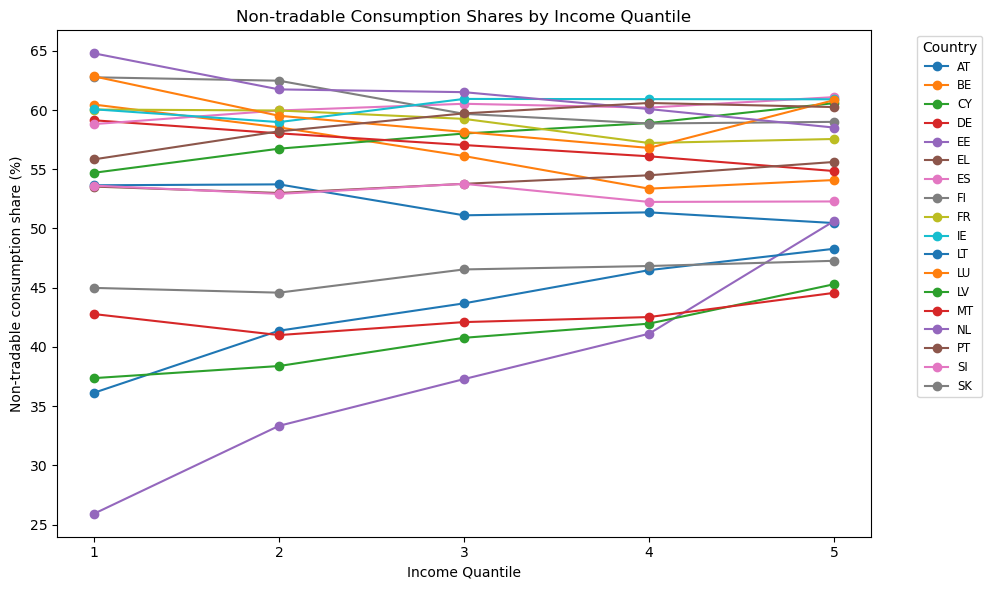

In [13]:
# START 

import pandas as pd
import matplotlib.pyplot as plt
from pandasdmx import Request

# 1. Setup
estat = Request('ESTAT')

coicops = [
    'CP011', 'CP012', 'CP021', 'CP022', 'CP031', 'CP032',
    'CP041', 'CP042', 'CP043', 'CP044', 'CP045',
    'CP051', 'CP052', 'CP053', 'CP054', 'CP055', 'CP056',
    'CP061', 'CP062', 'CP063',
    'CP071', 'CP072', 'CP073',
    'CP081', 'CP082', 'CP083',
    'CP091', 'CP092', 'CP093', 'CP094', 'CP095', 'CP096',
    'CP111', 'CP112',
    'CP121', 'CP122', 'CP123', 'CP124', 'CP125', 'CP126', 'CP127'
]

coicop_tradable = {
    'CP011': True, 'CP012': True, 'CP021': True, 'CP022': True,
    'CP031': True, 'CP032': True,
    'CP041': False, 'CP042': False, 'CP043': False, 'CP044': False, 'CP045': True,
    'CP051': True, 'CP052': True, 'CP053': True, 'CP054': True, 'CP055': True, 'CP056': True,
    'CP061': True, 'CP062': False, 'CP063': False,
    'CP071': True, 'CP072': False, 'CP073': False,
    'CP081': False, 'CP082': True, 'CP083': False,
    'CP091': True, 'CP092': True, 'CP093': True, 'CP094': False, 'CP095': True, 'CP096': True,
    'CP111': False, 'CP112': False,
    'CP121': False, 'CP122': False, 'CP123': False, 'CP124': False, 'CP125': False, 'CP126': False, 'CP127': False
}




import pandas as pd
import matplotlib.pyplot as plt
from pandasdmx import Request

estat = Request('ESTAT')

# Assumes coicops, coicop_tradable, and geos are defined
year = '2015'
geos = [
    'AT',  # Austria
    'BE',  # Belgium
    'CY',  # Cyprus
    'EE',  # Estonia
    'FI',  # Finland
    'FR',  # France
    'DE',  # Germany
    'EL',  # Greece
    'IE',  # Ireland
    'IT',  # Italy
    'LV',  # Latvia
    'LT',  # Lithuania
    'LU',  # Luxembourg
    'MT',  # Malta
    'NL',  # Netherlands
    'PT',  # Portugal
    'SK',  # Slovakia
    'SI',  # Slovenia
    'ES'   # Spain
]

data_list = []

for geo in geos:
    for coicop in coicops:
        try:
            data = estat.data(
                resource_id='HBS_STR_T223',
                key={'geo': geo, 'coicop': coicop},
                params={'startPeriod': year, 'endPeriod': year}
            )
            df = data.to_pandas().reset_index()
            df['coicop'] = coicop
            df['geo'] = geo
            data_list.append(df)
        except Exception as e:
            print(f"Error for {geo}-{coicop}: {e}")

# Combine and clean
df_all = pd.concat(data_list, ignore_index=True)
df_all = df_all[df_all['quantile'].str.startswith('QUINTILE')]
df_all['tradable'] = df_all['coicop'].map(coicop_tradable)
df_all['quantile_num'] = df_all['quantile'].str.extract(r'(\d)').astype(int)

# Aggregate
total = df_all.groupby(['geo', 'quantile_num'])['value'].sum().reset_index(name='total_value')
nontrad = df_all[~df_all['tradable']].groupby(['geo', 'quantile_num'])['value'].sum().reset_index(name='nontrad_value')

# Merge and compute share
df_merged = pd.merge(total, nontrad, on=['geo', 'quantile_num'], how='left')
df_merged['nontrad_value'] = df_merged['nontrad_value'].fillna(0)
df_merged['nontrad_share'] = df_merged['nontrad_value'] / df_merged['total_value']

# Plot
plt.figure(figsize=(10, 6))
for geo in df_merged['geo'].unique():
    country_data = df_merged[df_merged['geo'] == geo].sort_values('quantile_num')
    plt.plot(
        country_data['quantile_num'],
        country_data['nontrad_share'] * 100,
        marker='o',
        label=geo
    )



plt.xlabel('Income Quantile')
plt.ylabel('Non-tradable consumption share (%)')
plt.title('Non-tradable Consumption Shares by Income Quantile')
plt.xticks([1, 2, 3, 4, 5])
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()


In [14]:
from pandasdmx import Request
import pandas as pd

estat = Request('ESTAT')

# --- Download top cut-off point data from ilc_di01 ---
response = estat.data(
    resource_id='ILC_DI01',
    key={
        'indic_il': 'TC',        # Top cut-off point
        'quantile': ['QU1', 'QU2', 'QU3', 'QU4', 'QU5'],  # Income quintiles
        'geo': geos              # use your list of countries
    },
    params={'startPeriod': '2015', 'endPeriod': '2015'}
)

# Convert to DataFrame
income_df = response.to_pandas().reset_index()
income_df


# # Clean and rename
# # income_df['quantile_num'] = income_df['incgrp'].str.extract(r'QU(\d)').astype(int)
# # income_df = income_df[['geo', 'quantile_num', 2015]]
# # income_df.rename(columns={2015: 'income'}, inplace=True)

2025-06-18 18:08:18,916 pandasdmx.reader.sdmxml - INFO: Use supplied dsd=… argument for non–structure-specific message


,freq,quantile,indic_il,currency,geo,TIME_PERIOD,value
0,A,QU1,TC,EUR,AT,2015,15757.0
1,A,QU1,TC,EUR,BE,2015,14149.0
2,A,QU1,TC,EUR,CY,2015,8860.0
3,A,QU1,TC,EUR,DE,2015,13355.0
4,A,QU1,TC,EUR,EE,2015,4586.0
...,...,...,...,...,...,...,...
223,A,QU4,TC,PPS,MT,2015,24852.0
224,A,QU4,TC,PPS,NL,2015,27598.0
225,A,QU4,TC,PPS,PT,2015,16285.0
226,A,QU4,TC,PPS,SI,2015,20821.0


In [15]:
# Extract numeric quantile (1–5)
income_df['quantile_num'] = income_df['quantile'].str.extract(r'QU(\d)').astype(int)

# Rename value column to 'income' and keep relevant columns
income_df = income_df[['geo', 'quantile_num', 'currency', 'value']]
income_df.rename(columns={'value': 'income'}, inplace=True)

# Optional: Filter for one currency (e.g., 'EUR') if multiple are present
income_df = income_df[income_df['currency'] == 'EUR']
income_df

/var/folders/1t/shy39gf516g7nrfy2pmdkn780000gn/T/ipykernel_74632/4053061212.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_df.rename(columns={'value': 'income'}, inplace=True)


,geo,quantile_num,currency,income
0,AT,1,EUR,15757.0
1,BE,1,EUR,14149.0
2,CY,1,EUR,8860.0
3,DE,1,EUR,13355.0
4,EE,1,EUR,4586.0
...,...,...,...,...
185,MT,4,EUR,20102.0
186,NL,4,EUR,30309.0
187,PT,4,EUR,13315.0
188,SI,4,EUR,17001.0


In [16]:
df_final = pd.merge(df_merged, income_df[['geo', 'quantile_num', 'income']], on=['geo', 'quantile_num'], how='inner')


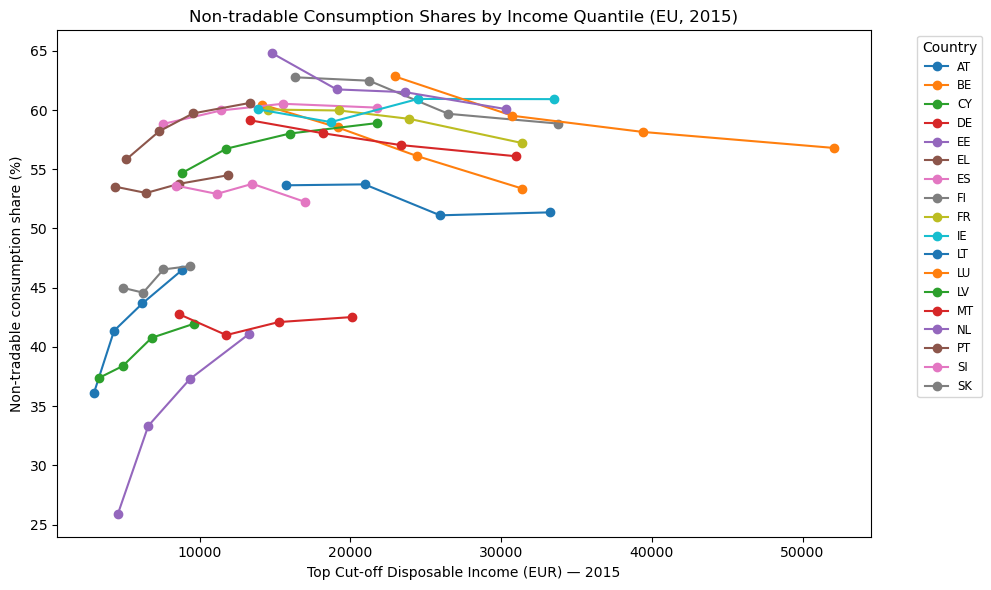

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for geo in df_final['geo'].unique():
    country_data = df_final[df_final['geo'] == geo].sort_values('income')
    plt.plot(
        country_data['income'],
        country_data['nontrad_share'] * 100,
        marker='o',
        label=geo
    )

plt.xlabel('Top Cut-off Disposable Income (EUR) — 2015')
plt.ylabel('Non-tradable consumption share (%)')
plt.title('Non-tradable Consumption Shares by Income Quantile (EU, 2015)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()


In [18]:
country_names = {
    'AT': 'Austria',
    'BE': 'Belgium',
    'BG': 'Bulgaria',
    'HR': 'Croatia',
    'CY': 'Cyprus',
    'CZ': 'Czechia',
    'DK': 'Denmark',
    'EE': 'Estonia',
    'FI': 'Finland',
    'FR': 'France',
    'DE': 'Germany',
    'GR': 'Greece',
    'HU': 'Hungary',
    'IE': 'Ireland',
    'IT': 'Italy',
    'LV': 'Latvia',
    'LT': 'Lithuania',
    'LU': 'Luxembourg',
    'MT': 'Malta',
    'NL': 'Netherlands',
    'PL': 'Poland',
    'PT': 'Portugal',
    'RO': 'Romania',
    'SK': 'Slovakia',
    'SI': 'Slovenia',
    'ES': 'Spain',
    'SE': 'Sweden'
}
df_final['country_name'] = df_final['geo'].map(country_names)

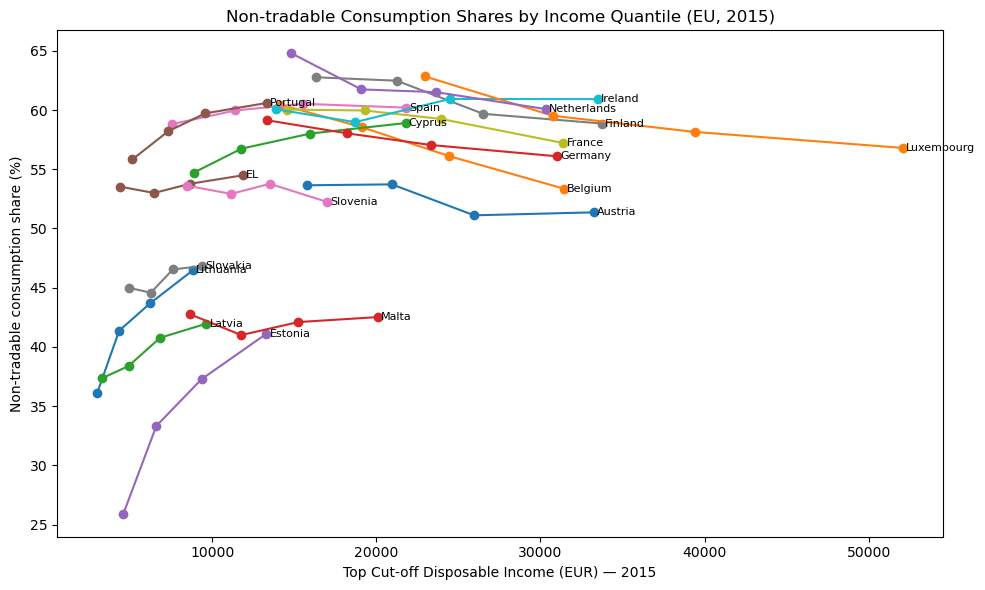

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for geo in df_final['geo'].unique():
    country_data = df_final[df_final['geo'] == geo].sort_values('income')
    name = country_names.get(geo, geo)
    
    plt.plot(
        country_data['income'],
        country_data['nontrad_share'] * 100,
        marker='o',
        label=name
    )

    # Add label at the last point
    x = country_data['income'].iloc[-1]
    y = (country_data['nontrad_share'] * 100).iloc[-1]
    plt.text(x + 200, y, name, fontsize=8, va='center')

plt.xlabel('Top Cut-off Disposable Income (EUR) — 2015')
plt.ylabel('Non-tradable consumption share (%)')
plt.title('Non-tradable Consumption Shares by Income Quantile (EU, 2015)')
plt.tight_layout()
plt.show()


# Slut

In [ ]:
# Get the dataset (typically a list with one element)
dataset = df.data[0]
dataset

In [ ]:
# This shows the structure of the response object
print(type(df))
print(df.data)

In [ ]:
# Get the dataset
dataset = df.data[0]

# Convert series to pandas
records = []
for key, series in dataset.series.items():
    obs = list(series.obs.items())[0]  # There’s only one year (2020), so one observation
    record = {**dict(zip(dataset.dimensions, key)), 'time': obs[0], 'value': obs[1].value}
    records.append(record)

# Create DataFrame
df_data = pd.DataFrame(records)


In [ ]:
df

In [ ]:
# List of unique COICOP codes
unique_coicops = df['coicop'].unique()
print("Unique COICOP codes:")
print(unique_coicops)

In [ ]:
from pandasdmx import Request
import pandas as pd

estat = Request('ESTAT')

# Define COICOPs (as per your image)
coicops = [
    'CP011', 'CP012', 'CP021', 'CP022', 'CP031', 'CP032', 'CP041', 'CP042', 'CP043', 'CP044', 'CP045',
    'CP051', 'CP052', 'CP053', 'CP054', 'CP055', 'CP056', 'CP061', 'CP062', 'CP063', 'CP071', 'CP072',
    'CP073', 'CP081', 'CP082', 'CP083', 'CP091', 'CP092', 'CP093', 'CP094', 'CP095', 'CP096',
    'CP111', 'CP112', 'CP121', 'CP122', 'CP123', 'CP124', 'CP125', 'CP126', 'CP127'
]

# Tradability classification
coicop_tradable = {
    'CP011': True, 'CP012': True, 'CP021': True, 'CP022': True,
    'CP031': True, 'CP032': True,
    'CP041': False, 'CP042': False, 'CP043': False, 'CP044': False, 'CP045': True,
    'CP051': True, 'CP052': True, 'CP053': True, 'CP054': True, 'CP055': True, 'CP056': True,
    'CP061': True, 'CP062': False, 'CP063': False,
    'CP071': True, 'CP072': False, 'CP073': False,
    'CP081': False, 'CP082': True, 'CP083': False,
    'CP091': True, 'CP092': True, 'CP093': True, 'CP094': False, 'CP095': True, 'CP096': True,
    'CP111': False, 'CP112': False,
    'CP121': False, 'CP122': False, 'CP123': False, 'CP124': False, 'CP125': False, 'CP126': False, 'CP127': False,
}

# Fetch data
response = estat.data(
    resource_id='HBS_STR_T223',
    key={
        'geo': 'EU27_2020',
        'coicop': 'CP051',
    },
    params={'startPeriod': '2020', 'endPeriod': '2020'}
)

response

# # Convert to DataFrame
# df = response.to_pandas().reset_index()

# # Add tradability classification
# df['tradable'] = df['coicop'].map(coicop_tradable)

# # Preview
# print(df.head())


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# File path and sheet
data_place = '/Users/emmagundersen/Desktop/Current code/Other data/Inflation.xls'
sheet = 'Data'

# Load the data
data = pd.read_excel(data_place, sheet_name=sheet, header=0)

# List of countries you want to plot
# selected_countries = ['Denmark', 'Austria', 'Belgium', 'Burkina Faso']
# selected_countries = [
#      "Belgium", "Denmark",
#     "Finland", "France", "Germany",
#     "Italy",  "Netherlands",   "Spain", 
#    "United Kingdom", "United States",  "Euro area"
# ]
selected_countries = [
     "Denmark",
    "Finland", "Germany",
      "Netherlands",  
   "United Kingdom", "United States",  "Euro area", 'Wolrd', 
]

# Filter the data for selected countries
filtered_data = data[data['Country Name'].isin(selected_countries)]

# Set 'Country Name' as index for easier plotting
filtered_data.set_index('Country Name', inplace=True)

# Extract only the year columns (assuming they start at 1960 and are of type int or str)
year_columns = [col for col in filtered_data.columns if str(col).isdigit()]
filtered_data = filtered_data[year_columns]

# Transpose the data to have years on x-axis
filtered_data_T = filtered_data.transpose()



# Ensure the index is integers (years)
filtered_data_T.index = filtered_data_T.index.astype(int)

# Filter to only show data from 1980 onwards
filtered_data_T = filtered_data_T[filtered_data_T.index >= 1985]

# Plot
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()

for country in filtered_data_T.columns:
    ax.plot(filtered_data_T.index, filtered_data_T[country], label=country)

ax.set_title('Inflation Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Inflation Rate (\%)')
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.legend(loc='upper left')
ax.set_ylim(-1, 15)  # Adjust y-axis limits as needed
plt.grid(True)
plt.tight_layout()

fig.savefig('plots/inflation_over_time.png', dpi=300, bbox_inches='tight')

# Energy prices

In [ ]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load monthly US energy CPI data
start = datetime.datetime(1985, 1, 1)
end = datetime.datetime(2025, 1, 1)
us_energy = web.DataReader('CPIENGSL', 'fred', start, end)

# Rename for clarity
us_energy.rename(columns={'CPIENGSL': 'United States - Energy CPI'}, inplace=True)

# Plot
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()

ax.plot(us_energy.index, us_energy['United States - Energy CPI'], label='United States - Energy CPI')

ax.set_title('US Energy CPI (Monthly)')
ax.set_xlabel('Year')
ax.set_ylabel('CPI Index (1982–84 = 100)')

# Format x-axis to show only years
# Show only every 5th year on x-axis
ax.xaxis.set_major_locator(mdates.YearLocator(base=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=0)

ax.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()

# Save the figure
fig.savefig('plots/us_energy_cpi_monthly_year_ticks.png', dpi=300, bbox_inches='tight')


In [ ]:
import pandasdmx

client = pandasdmx.Request('ESTAT')

# Get all available datasets from Eurostat
resp = client.get(resource_type='dataflow')
dataflows = resp.dataflow

# Print dataset IDs and descriptions
for key, flow in dataflows.items():
    print(f"{key}: {flow.name.en}")


In [ ]:
dsd = resp.structure['PRC_HICP_MIDX']
# Access the structure definition


# List all dimension IDs
for dim in dsd.dimensions:
    print(dim.id)

geo_codes = dsd.dimensions.get('geo').local_representation.enumerated

for code in geo_codes:
    print(code.id, "-", code.name.en)

In [ ]:
import pandasdmx
import pandas as pd
import matplotlib.pyplot as plt

# Eurostat SDMX client
client = pandasdmx.Request('ESTAT')

# Country codes and names
countries = {
    'DE': 'Germany',
    'FR': 'France',
    'NL': 'Netherlands',
    'IT': 'Italy',
    'ES': 'Spain'
}

all_data = []

for code, name in countries.items():
    print(f"Fetching: {name}")
    try:
        response = client.data(
            resource_id='PRC_HICP_MIDX',
            key={
                'freq': 'M',
                'unit': 'I15',       # Index (2015 = 100)
                'coicop': 'CP-HIE',  # Energy
                'geo': code
            },
            params={'startPeriod': '2010', 'endPeriod': '2025'}
        )

        df = response.data.to_pandas().reset_index()
        df.columns = ['Time', 'Energy_Index']
        df['Time'] = pd.to_datetime(df['Time'])
        df['Country'] = name
        all_data.append(df)

    except Exception as e:
        print(f"Failed to fetch {name}: {e}")

# Only continue if data was fetched
if all_data:
    df_all = pd.concat(all_data)
    pivot_df = df_all.pivot(index='Time', columns='Country', values='Energy_Index')

    # Plot
    plt.figure(figsize=(12, 6))
    for country in pivot_df.columns:
        plt.plot(pivot_df.index, pivot_df[country], label=country)

    plt.title('HICP Energy Index (2015 = 100)')
    plt.xlabel('Year')
    plt.ylabel('Index (2015 = 100)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend(title='Country')
    plt.tight_layout()
    plt.savefig('plots/hicp_energy_multiple_countries.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("No data fetched. Please check country codes or dimension values.")


In [ ]:
import pandas as pd

url = "https://ec.europa.eu/eurostat/api/dissemination/sdmx/3.0/data/dataflow/ESTAT/prc_hicp_midx$defaultview/1.0?compress=true&format=csvdata&formatVersion=1.0&lang=en&labels=label_only"

# Load gzip-compressed CSV
df = pd.read_csv(url, compression='gzip')

# Preview columns
print(df.columns)


In [ ]:
df['coicop'].unique()
df['geo'].unique()


In [ ]:
df['coicop'].unique()